dataset: [here](https://archive.ics.uci.edu/ml/datasets/automobile)

## Automobile Data Set

#### Data Set Information:


This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. 

Note: Several of the attributes in the database could be used as a "class" attribute.

#### Attribute Information
Attribute: Attribute Range 

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

#### Import Library

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set( palette="muted", color_codes=True,style="whitegrid")

import matplotlib.pyplot as plt

#### Load dataset

In [3]:
df_am_losses = pd.read_csv('DATASET/Automobile/automobile-losses.csv')
df_am_risk = pd.read_csv('DATASET/Automobile/automobile-risk.csv')
df_am_spec = pd.read_csv('DATASET/Automobile/automobile-spec.csv')

In [4]:
df_am_losses.head()

,ID,normalized-losses
0,1,NaN
1,2,NaN
2,3,NaN
3,4,164.0
4,5,164.0


In [5]:
df_am_risk.head()

,ID,symboling
0,1,3
1,2,3
2,3,1
3,4,2
4,5,2


In [6]:
df_am_spec.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### 1. Join 3 tables using ID as key

In [11]:
df2 = pd.merge(df_am_spec,df_am_risk,how='outer',on='ID')
df3 = pd.merge(df2,df_am_losses,how='outer',on='ID')
df3.set_index('ID')
df3.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3,NaN
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3,NaN
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,NaN
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2,164.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2,164.0


In [38]:
df3.tail()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
200,201,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,-1,95.0
201,202,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,-1,95.0
202,203,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,-1,95.0
203,204,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,-1,95.0
204,205,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0,-1,95.0


#### Type Data

In [40]:
df3.dtypes

ID                     int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheel           object
engine-loc            object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
cylinder              object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
symboling              int64
normalized-losses    float64
dtype: object

In [36]:
df3.describe()

,ID,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329366,3.256098,10.142537,104.165854,5125.369458,25.219512,30.751220,13150.307317,0.834146,120.600000
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270858,0.313634,3.972040,39.529733,479.334560,6.542142,6.886443,7879.121326,1.245307,31.805105
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,-2.000000,65.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000,101.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000,115.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,2.000000,137.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,3.000000,256.000000


#### Check Null Column

In [20]:
df3.isnull().sum()

ID                    0
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheel           0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
symboling             0
normalized-losses    41
dtype: int64

#### Check Shape

In [41]:
df3.shape

(205, 27)

#### Check duplicate row(s)

In [43]:
duplicate_rows_df = df3[df3.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)
#df3 = df3.drop_duplicates()

number of duplicate rows:  (0, 27)


#### 3. Identify missing value. If any, how will you handle it?

In [19]:
df3['num-of-doors'].fillna(value=df3['num-of-doors'].value_counts().index[0],inplace =True)

In [26]:
df3['bore'].fillna(value=df3['bore'].median(),inplace =True)

In [27]:
df3['stroke'].fillna(value=df3['stroke'].median(),inplace =True)

In [29]:
df3['horsepower'].fillna(value=df3['horsepower'].median(),inplace =True)

In [30]:
df3['peak-rpm'].fillna(value=df3['peak-rpm'].median(),inplace =True)

In [31]:
df3['price'].fillna(value=df3['price'].median(),inplace =True)

In [35]:
df3['normalized-losses'].fillna(value=df3['normalized-losses'].median(),inplace =True)

#### Visualize

Perform visualization using at least 5 difference visualization technique (barplot, scatter plot, area, boxplot, pie chart, line chart, etc)

##### Countplot

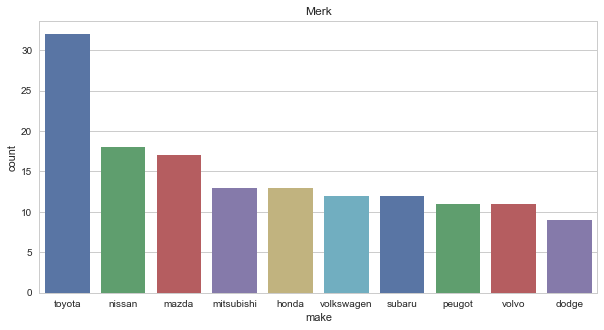

In [156]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x= df3['make'],palette='deep', label = 'Merk',order = df3['make'].value_counts(ascending = False).index[:10]).set_title('Merk')

##### Distplot

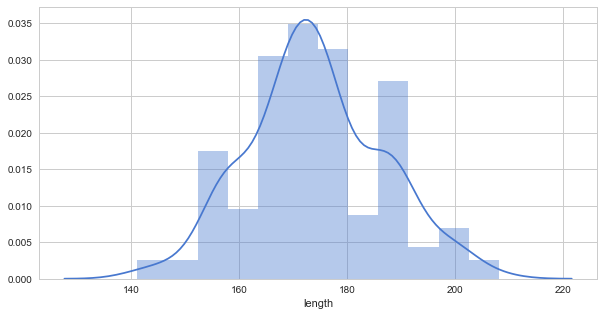

In [171]:
plt.figure(figsize=(10,5))
fig = sns.distplot(df3['length'])

In [188]:
# size = df3[['length','width','height']]
# size.head()
# top3_car = df3['make'].value_counts(ascending = False).index[:3]
# top3_car
# plt.figure(figsize=(10,5))
# fig = sns.distplot(x='size',hue='top3_car')

##### Violinplot

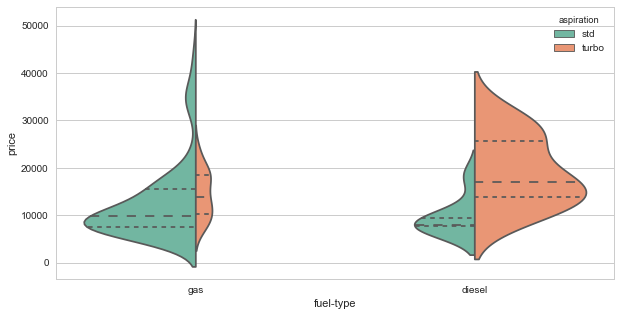

In [167]:
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="fuel-type", y="price", hue="aspiration",
                   data=df3, palette="Set2", split=True,
                   scale="count", inner="quartile")

##### Boxplot

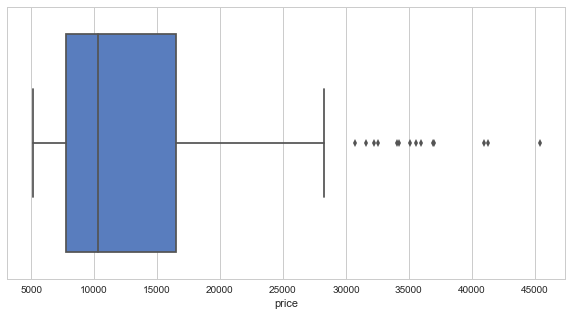

In [168]:
plt.figure(figsize=(10,5))
fig = sns.boxplot(df3['price'], orient="h")

##### Scatterplot

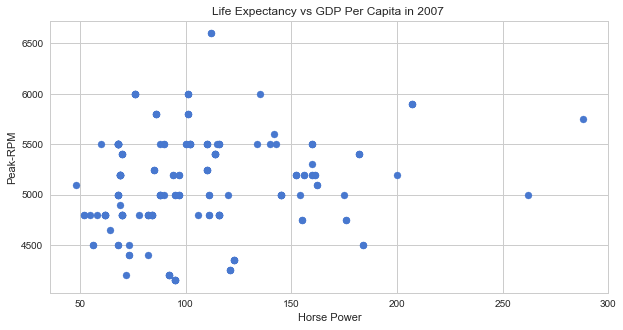

In [85]:
plt.figure(figsize=(10,5))
plt.scatter(df3['horsepower'],df3['peak-rpm'])
plt.title('Life Expectancy vs GDP Per Capita in 2007 ')
plt.xlabel('Horse Power')
plt.ylabel('Peak-RPM')
plt.show()

* * *

##### Heatmap

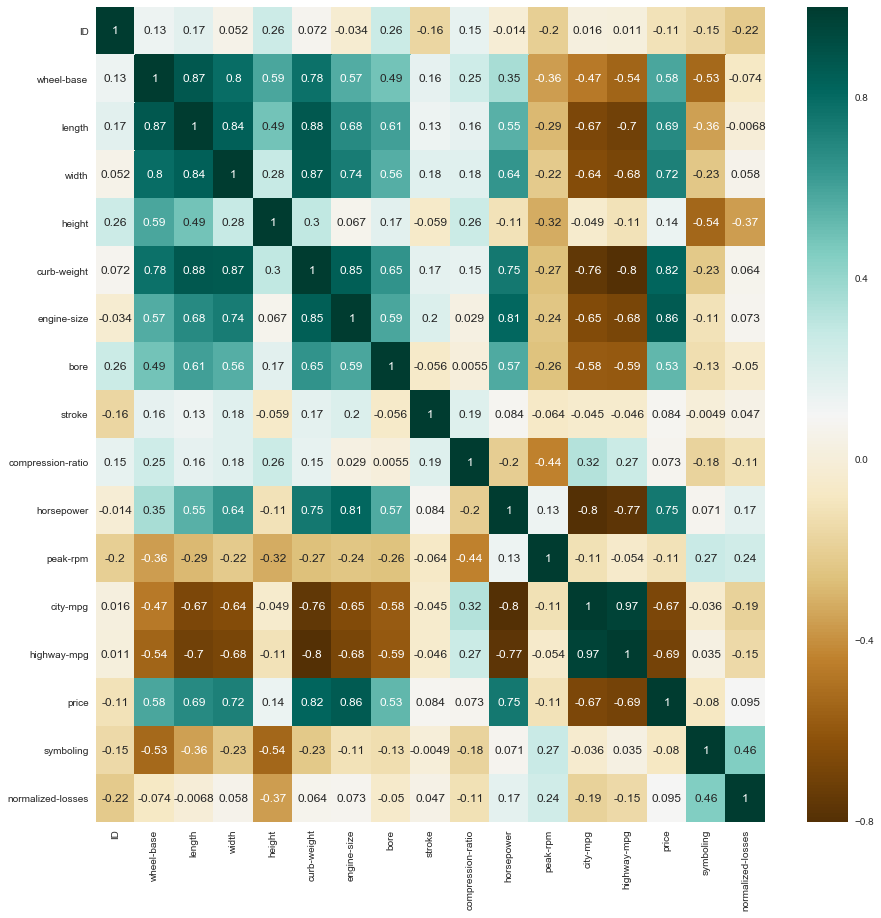

In [94]:
plt.figure(figsize=(15,15))
c= df3.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

* * *

### Part 2 Find answer for below question

Car brand with highest price

In [108]:
df4 = df3[['make','price']]
print(df4.nlargest(1, 'price'))

             make    price
74  mercedes-benz  45400.0


Maximum horsepower for car with 6 cylinder engine

In [119]:
df5 = df3[['horsepower','cylinder']]
df5 = df5[(df5['cylinder'] == 'six')]
print(df5.nlargest(1, 'horsepower'))

     horsepower cylinder
126       207.0      six


Average peak-rpm for ‘turbo’ style aspiration car

In [123]:
df3['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [143]:
df6 = df3[['peak-rpm','aspiration']]
df6 = df6.loc[df6['aspiration'] == 'turbo']
print('avg peak rpm: ' + str(df6["peak-rpm"].mean()))

avg peak rpm: 4939.189189189189


Average price based on body-style

In [145]:
df7 = df3[['price','body-style']]
df7.groupby(['body-style']).mean()

,price
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,9967.085714
sedan,14372.989583
wagon,12371.960000


Average price based on body-style only for Honda car (make=Honda)

In [152]:
df8 = df3[['price','make']]
df8 = df8.loc[df8['make']=='honda']
print('avg price for honda car: '+str(df8['price'].mean()))

avg price for honda car: 8184.692307692308


* * *